In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# Code sample taken from book: Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (2nd edition)

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [4]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.7106 - accuracy: 0.7659 - val_loss: 0.5326 - val_accuracy: 0.8076
Epoch 2/30
55000/55000 [==============================] - 5s 100us/sample - loss: 0.4877 - accuracy: 0.8302 - val_loss: 0.4516 - val_accuracy: 0.8458
Epoch 3/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.4430 - accuracy: 0.8437 - val_loss: 0.4472 - val_accuracy: 0.8330
Epoch 4/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4151 - accuracy: 0.8536 - val_loss: 0.4016 - val_accuracy: 0.8642
Epoch 5/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.3935 - accuracy: 0.8621 - val_loss: 0.3873 - val_accuracy: 0.8652
Epoch 6/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.3775 - accuracy: 0.8659 - val_loss: 0.3718 - val_accuracy: 0.8710
Epoch 7/30
55000/55000 [============================

In [5]:
# Code sample taken from book: Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (2nd edition)

#from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
print(X_train.shape, y_train.shape)

In [7]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [8]:


model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 20s 365us/sample - loss: 0.7178 - accuracy: 0.7511 - val_loss: 0.3918 - val_accuracy: 0.8524
Epoch 2/10
55000/55000 [==============================] - 15s 271us/sample - loss: 0.4264 - accuracy: 0.8581 - val_loss: 0.3227 - val_accuracy: 0.8816
Epoch 3/10
55000/55000 [==============================] - 15s 273us/sample - loss: 0.3681 - accuracy: 0.8758 - val_loss: 0.2973 - val_accuracy: 0.8902
Epoch 4/10
55000/55000 [==============================] - 16s 286us/sample - loss: 0.3346 - accuracy: 0.8865 - val_loss: 0.3166 - val_accuracy: 0.8910
Epoch 5/10
55000/55000 [==============================] - 15s 270us/sample - loss: 0.3083 - accuracy: 0.8942 - val_loss: 0.2857 - val_accuracy: 0.8966
Epoch 6/10
55000/55000 [==============================] - 15s 269us/sample - loss: 0.2973 - accuracy: 0.8998 - val_loss: 0.2980 - val_accuracy: 0.8968
Epoch 7/10
55000/55000 [=====================

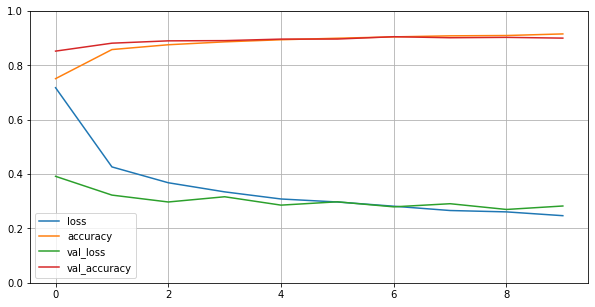

In [9]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred